# グラフでマルチバイト文字を使うためのライブラリのインストール

In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=456f679ffb34ed6bc95a408f882335e7de27e520fa3ae8af238fe0c61362bd84
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


# 乱数の固定

In [ ]:
import os
import random
import numpy as np

np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

# 関数 save_fig：図の保存用

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0.2)

# 関数 show_history：学習過程の可視化

In [ ]:
def show_history(history, file_prefix=''):
    """学習過程（損失と正解率）を可視化する
    Args:
        history (tf.keras.callbacks.History): 損失やモニターする指標を格納したオブジェクト
    """
    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(wspace=0.2)

    # 学習曲線の表示
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], 'black', label='Training')
    plt.plot(history.history['val_loss'], 'cornflowerblue', label='Test')
    plt.legend(fontsize=16)
    plt.xlabel('エポック', fontsize=16)
    plt.title('損失', fontsize=16)
    plt.ylim(0, )
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)

    # 正解率表示
    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], 'black', label='Training')
    plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='Test')
    plt.legend(fontsize=16)
    plt.xlabel('エポック', fontsize=16)
    plt.title('正解率', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0, 1.2)
    plt.grid(True)

    save_fig(plt, file_prefix)

    plt.show()

# 関数 evaluate：性能評価関数

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

def evaluate(y_true, y_pred, file_prefix=''):
    """予測結果に対する性能評価を行う。正解率、精度、再現率の計算。混同行列をヒートマップとして可視化。
    Args:
        y_true (ndarray): 正解クラスラベル。形状は(B, C)。Bは画像枚数、Cはクラス数
        y_pred (ndarray): 予測クラスラベル。形状は(B, C)。Bは画像枚数、Cはクラス数
        file_prefix (str): 可視化結果を保存する際のファイル名接頭辞
    """
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    print('正解率')
    print(f' {accuracy:.2f}')

    class_labels = []

    num_classes = np.max(y_true) + 1
    for i in range(num_classes):
        class_labels.append(f'{i:4d}')

    precision_str = []
    recall_str = []
    for i in range(num_classes):
        precision_str.append(f'{precision[i]:.2f}')
        recall_str.append(f'{recall[i]:.2f}')

    print('精度')
    print(' ' + ' '.join(class_labels))
    print(' ' + ' '.join(precision_str))

    print('再現率')
    print(' ' + ' '.join(class_labels))
    print(' ' + ' '.join(recall_str))

    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True, fmt='3d', square=True, cmap='hot')
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 関数 show_prediction：予測結果の可視化

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import glob
import os

def show_prediction(images, y_true, y_pred, rows=4, cols=5, file_prefix=''):
    '''画像に対して予測結果を表示する。
    Args:
        img_dir (str): 画像ファイルのあるディレクトリ
        model (Sequential): ニューラルネットワーク・モデル
        rows (int): 表示する行数
        cols (int): 表示する列数。予測する画像枚数はrows * cols。
        file_prefix (str): 可視化結果を保存する際のファイル名接頭辞
    '''

    labels = ['a', 'b', 'c','d','e','f','g']

    # AIが認識した結果を画像と一緒に提示する
    plt.figure(2, figsize=(4*cols, 4*rows))

    categories = ['a', 'b', 'c','d','e','f','g']

    for i in range(len(images)):
        img = images[i].numpy()
        # img = img[..., ::-1]
        min = img.min()
        max = img.max()
        img = (img - min) / (max - min)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        p = y_pred[i]
        t = y_true[i]
        if p != t:
            plt.title('{0}'.format(categories[p]), fontsize=18, color='red')
        else:
            plt.title(categories[t], fontsize=18)

        plt.axis('off')

    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

画像の形状: (335, 421, 3)


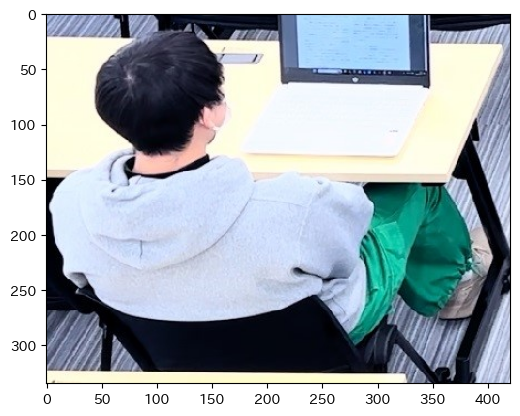

In [ ]:
import os
import glob
from PIL import Image

# 教師データの起点フォルダ
TOP_DIR = 'Untitled Folder'

# TOP_DIR以下のサブフォルダを再帰的にたどり、すべてのjpgファイルを列挙
files=glob.glob(TOP_DIR + '/**/*.jpg', recursive=True)
files.sort() # ファイル順名にソート

# 最初のファイルを取り出す
sample_file=files[0]

# 画像ファイルを開く
image=Image.open(sample_file)

# 画像からNumpy配列を生成
image=np.array(image)
print('画像の形状:',image.shape)

# 画像の表示
plt.imshow(image)
plt.show()

In [ ]:
from tensorflow.keras.layers import RandomFlip

def augment(image,layer):
    """
    元画像とデータ拡張を適用した8枚の画像、計9枚を
    3行3列の配置で表示。
    Args:
        image: 元画像
        layer: データ拡張用レイヤー
    """
    # 元画像を1行1列目に表示。
    plt.figure(figsize=(9,9))
    plt.subplot(3,3,1)
    plt.imshow(image)
    plt.axis('off')
    # 画像の番号に対応する次元を追加して、4次元配列とする。
    batch_image=np.expand_dims(image,axis=0)
    # 元画像に対して、データ拡張を適用した8枚の画像を作成
    for i in range(8):
        augmented=layer(batch_image)
        plt.subplot(3,3,i+2)
        plt.imshow(augmented[0].numpy().astype('uint8'))
        plt.axis('off')

    plt.show()

# 関数の外
# ランダムフリップ用レイヤー。確率0.5で左右反転を適用。
rf=RandomFlip(mode='horizontal')
augment(image,rf)

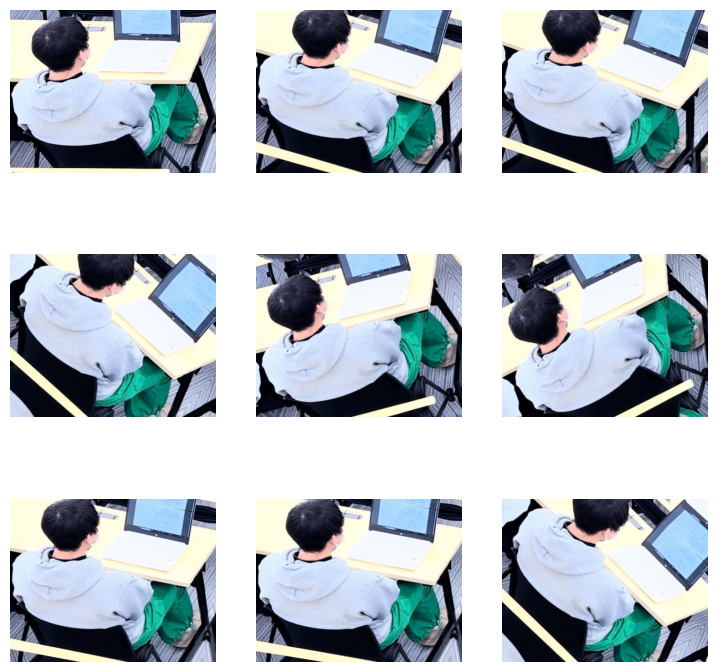

In [ ]:
from tensorflow.keras.layers import RandomRotation

# ランダム回転用レイヤー
# 0.125ラジアン＝45度。±45度の範囲でランダムな回転を画像に適用。
rr=RandomRotation(0.125)
augment(image,rr)

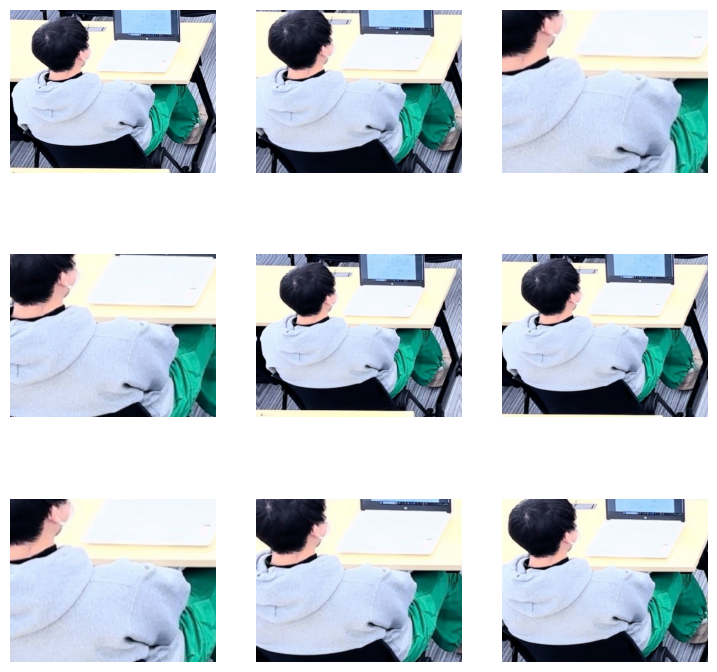

In [ ]:
from tensorflow.keras.layers import RandomZoom

# ランダムズーム用レイヤー
# 縮小率0.5以上拡大率1.2までのランダムな縮小拡大を画像に適用。
# 負値は縮小率、正値は拡大率
rz=RandomZoom((-0.5,0.1))
augment(image,rz)

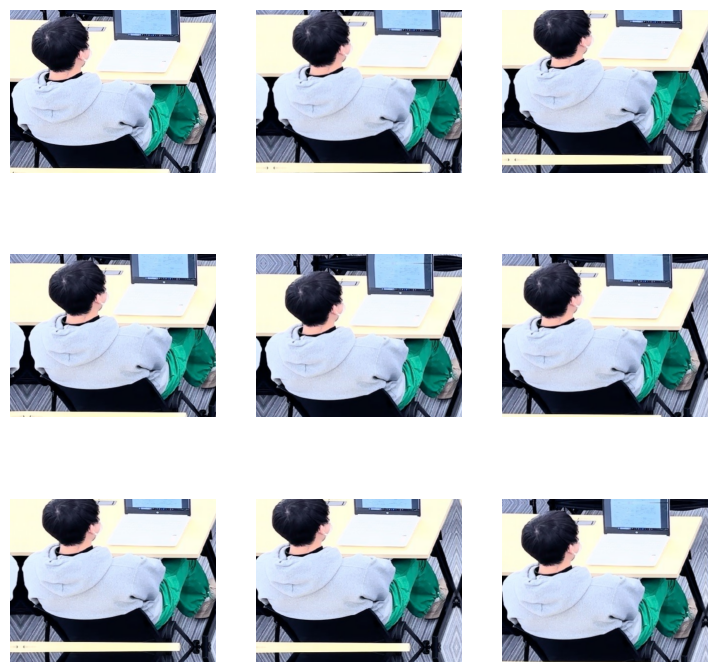

In [ ]:
from tensorflow.keras.layers import RandomTranslation

# ランダム平行移動用レイヤー

rt=RandomTranslation(0.1, # 縦方向の移動量の最大値。縦方向画素数に対する割合
                     0.1) # 横方向の移動量の最大値。横方向画素数に対する割合
augment(image,rt)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

TOP_DIR = './Untitled Folder'
# 訓練データセット
train_dataset=image_dataset_from_directory(TOP_DIR + '/train',   # 訓練データの場所。
                                                 image_size=(224,224), # ネットワークへ入力する画像の高さと幅。
                                                 batch_size=16,        # バッチサイズ。
                                                 shuffle=True)         # 読み込む画像の順番をシャッフルする。
test_dataset=image_dataset_from_directory(TOP_DIR + '/test',     # テストデータの場所。
                                                image_size=(224,224),  # ネットワークへ入力する画像の高さと幅。
                                                batch_size=16,         # バッチサイズ。
                                                shuffle=False)         # 読み込む画像の順番をシャッフルしない。

Found 244 files belonging to 7 classes.
Found 87 files belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
#input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
# VGGモデルインスタンスを生成
vgg16 = VGG16(include_top=False,       # 全結合層を読み込まない),input_tensor=input_tens
              weights='imagenet',      # データセットImageNetで学習したパラメータを読み込む
              input_shape=(224,224,3)) # ネットワークへの入力画像の形状（高さ、幅、チャネル数）

# モデルの要約情報を表示
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip,RandomZoom,RandomRotation,RandomTranslation
from tensorflow.keras.layers import InputLayer, Lambda, Rescaling
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Dropout

# ネットワークのパラメータ（重みとバイアス）を初期化する際の乱数シードを固定
tf.random.set_seed(0)

def rgb2bgr(image):
    """画像のチャネル成分をRGBからBGRに並び替える。
    Args:
        image: 元画像
    Returns:
        チャネル成分を並び替えた画像
    """
    return image[..., ::-1]

# データ拡張層
data_augmentation = Sequential(
    [
    RandomZoom((-0.5,0.1)),
    RandomFlip('horizontal'),
    RandomTranslation(0.1,0.1),
    RandomRotation(0.125)
    ]
)

model=Sequential() # ネットワークモデルを生成input_
model.add(InputLayer(shape=(224,224,3)))  # 入力層を追加
model.add(data_augmentation)  # 入力層の直後にデータ拡張層を追加
model.add(Lambda(rgb2bgr))  # Lambdaレイヤー。任意の関数をレイヤーとして扱う。
model.add(Rescaling(1/255.0))  # 画素値[0, 1]に正規化する層を追加

# VGG16特徴抽出部分の層をモデルに追加する。
# ただし、最後のマックスプーリング層は除く。
for layer in vgg16.layers[1:15]: # 特徴抽出部分の各レイヤーについて
    layer.trainable = False # VGG-16特徴抽出部分の層は学習不可能にする。
    model.add(layer)

for layer in vgg16.layers[15:]:
    layer.trainable = True
    model.add(layer)

# 大域平均プーリング層を追加GlobalMaxPooling2D()
#model.add(GlobalAveragePooling2D())

######################
# 特徴分類用の層を追加
######################
# 畳み込み層からの出力を全結合層へ入力するために形状変形
model.add(Flatten())

# ドロップアウト
model.add(Dropout(0.5)) # rate=0.5の割合でドロップアウトさせる

# 全結合層
model.add(Dense(256,                # ニューロン数
                activation='relu')) # 活性化関数

# ドロップアウト
model.add(Dropout(0.5)) # rate=0.5の割合でドロップアウトさせる

# 出力層
model.add(Dense(7,                     # ニューロン数
                activation='softmax')) # 活性化

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # クラス分類用損失関数
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),        # 最適化手法Adam(learning_rate=3e-5)
              metrics=['accuracy'])       # 損失の他にモニターする指標として正解率を指定

# モデルの要約情報を表示
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,139,271 (80.64 MB)

 Trainable params: 13,504,007 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
"""
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # クラス分類用損失関数
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),        # 最適化手法Adam(learning_rate=3e-5)
              metrics=['accuracy'])
"""
# 学習開始。終了後、学習の履歴がhistoryに代入される
history=model.fit(train_dataset,                # 訓練データ
                  epochs=800,                      # エポック数
                  validation_data=test_dataset,) # テストデータ
model.save('my_model.keras')
model.save_weights('modelw.weights.h5')

Epoch 1/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.1652 - loss: 2.6346 - val_accuracy: 0.1325 - val_loss: 1.9978
Epoch 2/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.1399 - loss: 2.1600 - val_accuracy: 0.1325 - val_loss: 1.9447
Epoch 3/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.1587 - loss: 1.9481 - val_accuracy: 0.1084 - val_loss: 1.9349
Epoch 4/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.1089 - loss: 1.9373 - val_accuracy: 0.1928 - val_loss: 1.9416
Epoch 5/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.1968 - loss: 1.9448 - val_accuracy: 0.1446 - val_loss: 1.9450
Epoch 6/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.1601 - loss: 1.9398 - val_accuracy: 0.1566 - val_loss: 1.9334
Epoch 7/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.1583 - loss: 1.9310 - val_accuracy: 0.1325 - val_loss: 1.9409
Epoch 8/800
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.2268 - loss: 1.9035 - val_accu

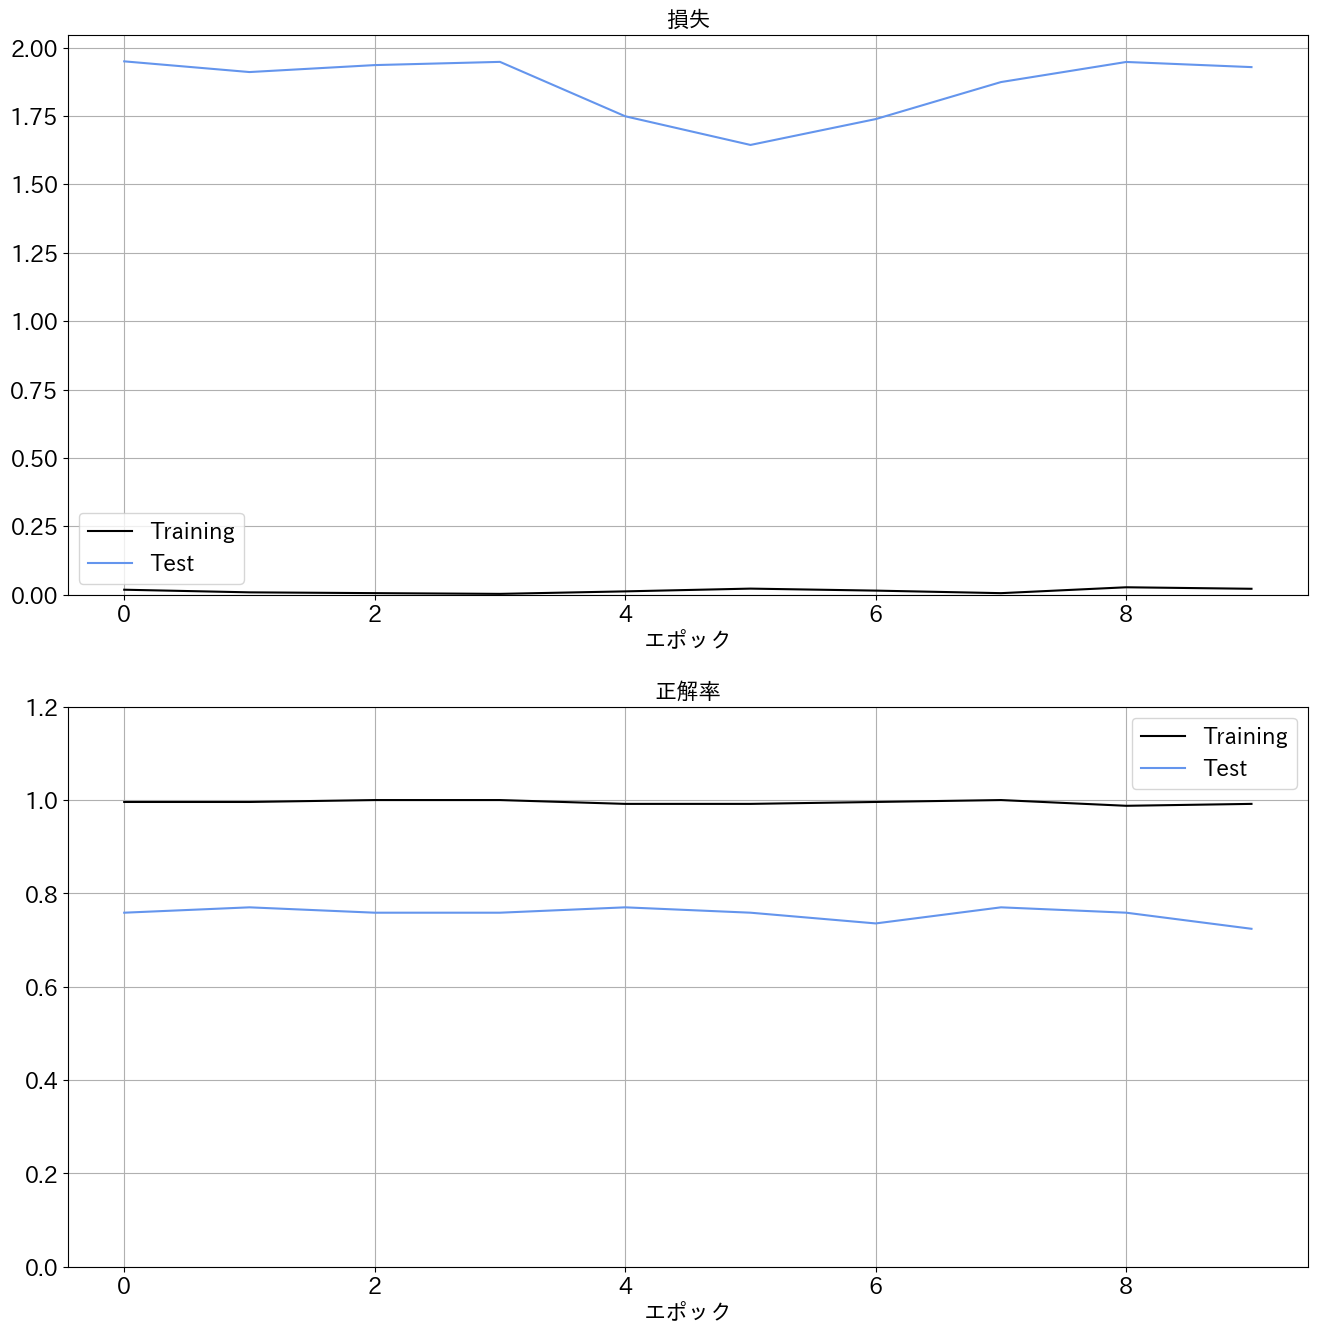

[[5.78375101e-01 4.19547915e-01 1.56519448e-07 1.21948699e-06
  2.52726942e-08 5.93117111e-05 2.01626262e-03]
 [1.44658334e-05 1.45080055e-08 9.99507666e-01 4.77725524e-04
  1.28996831e-07 4.84173313e-10 3.15332649e-08]
 [1.00000000e+00 1.36109908e-11 8.09730158e-13 1.69441674e-14
  5.72009546e-20 8.15107530e-12 7.27565902e-13]
 [9.99999642e-01 3.83797840e-07 5.62751588e-08 3.74923786e-10
  3.40749065e-12 5.20422927e-10 1.29663027e-08]
 [9.99999881e-01 3.98585553e-10 8.07902438e-08 6.97468749e-11
  1.27654324e-15 1.75841796e-12 4.01868608e-11]
 [7.79615875e-05 9.99921799e-01 3.17543242e-10 4.53443793e-12
  3.16301464e-11 2.78379304e-07 2.63359057e-10]
 [9.99712765e-01 2.04318058e-04 6.72268216e-05 4.78383875e-08
  2.94446068e-07 1.24046310e-05 2.87310104e-06]
 [1.44220714e-03 4.96848254e-04 4.32333164e-03 9.93735492e-01
  3.15754023e-09 9.11276004e-07 1.24314681e-06]
 [1.35000766e-06 9.99998689e-01 3.20567687e-15 7.60898220e-16
  2.27665304e-16 8.28505320e-11 1.96169764e-14]
 [1.583008

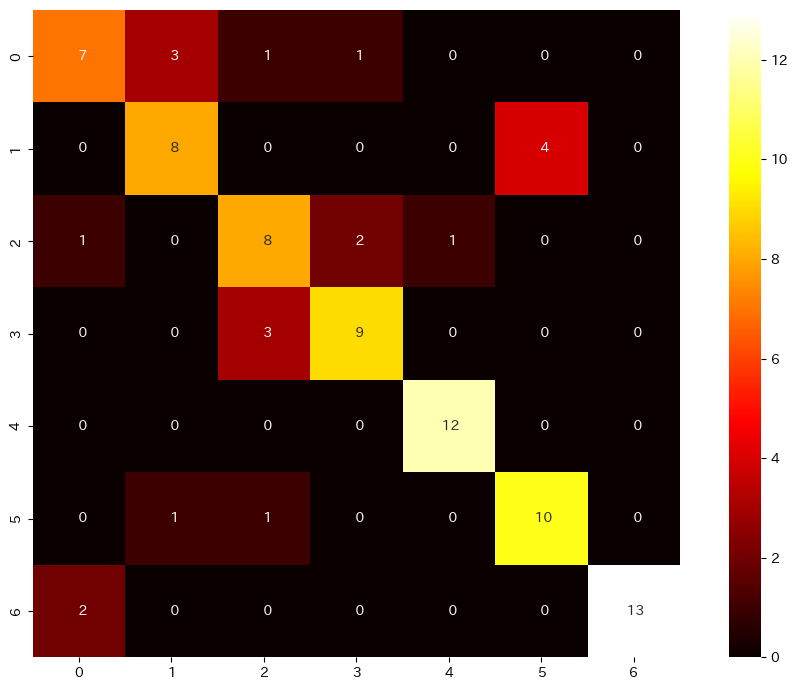

In [ ]:
# 学習の履歴（損失と正解率の変化）を表示
show_history(history)

# テストデータセットからすべてのラベルを取得する
y_true=[]
for images, labels in test_dataset:
    y_true.append(labels)
y_true=np.concatenate(y_true)

# 学習したモデルを使い、全テストデータに対する予測を行う
# y_pred: 各画像について、クラス1である予測確率

y_pred=model.predict(test_dataset, verbose=0)
print(y_pred)
print(model.evaluate(test_dataset, verbose=0))
# クラス1に対する予測確率が0.5より大きいものをクラス1とする
#y_pred=(y_pred>0.5)*1
y_pred=np.argmax(y_pred, axis=1)
print(y_pred)
# 汎化性能を評価する関数の呼び出し
evaluate(y_true,y_pred)

Found 83 files belonging to 7 classes.
画像枚数: 16
[[5.60705476e-02 8.54706228e-01 8.34968960e-05 3.03876237e-04
  2.38189095e-05 7.91076571e-02 9.70430765e-03]
 [1.27690837e-01 1.69534013e-02 2.94985294e-01 4.32694703e-01
  2.80839279e-02 5.03815748e-02 4.92102765e-02]
 [1.53665366e-02 2.56139581e-04 6.58285379e-01 3.14280987e-01
  1.08971149e-02 6.25483401e-04 2.88311421e-04]
 [1.76986605e-02 1.92634072e-02 1.86709258e-05 8.04695810e-05
  1.17337061e-06 2.02811952e-03 9.60909605e-01]
 [8.70129280e-03 2.96266153e-02 3.61461163e-04 8.19900539e-04
  1.01803918e-04 2.65701488e-02 9.33818758e-01]
 [4.73959483e-02 2.12565679e-02 3.64165097e-01 3.55441958e-01
  1.20728008e-01 6.22276664e-02 2.87847184e-02]
 [1.12388152e-05 1.42494473e-05 1.22141829e-02 3.32065951e-03
  9.83387351e-01 1.00656645e-03 4.57575807e-05]
 [5.65235168e-02 2.93524266e-04 6.40450835e-01 2.99592406e-01
  2.89308513e-03 1.56642156e-04 8.99753431e-05]
 [3.93112302e-02 6.74735149e-03 4.74564165e-01 3.21671009e-01
  1.389396

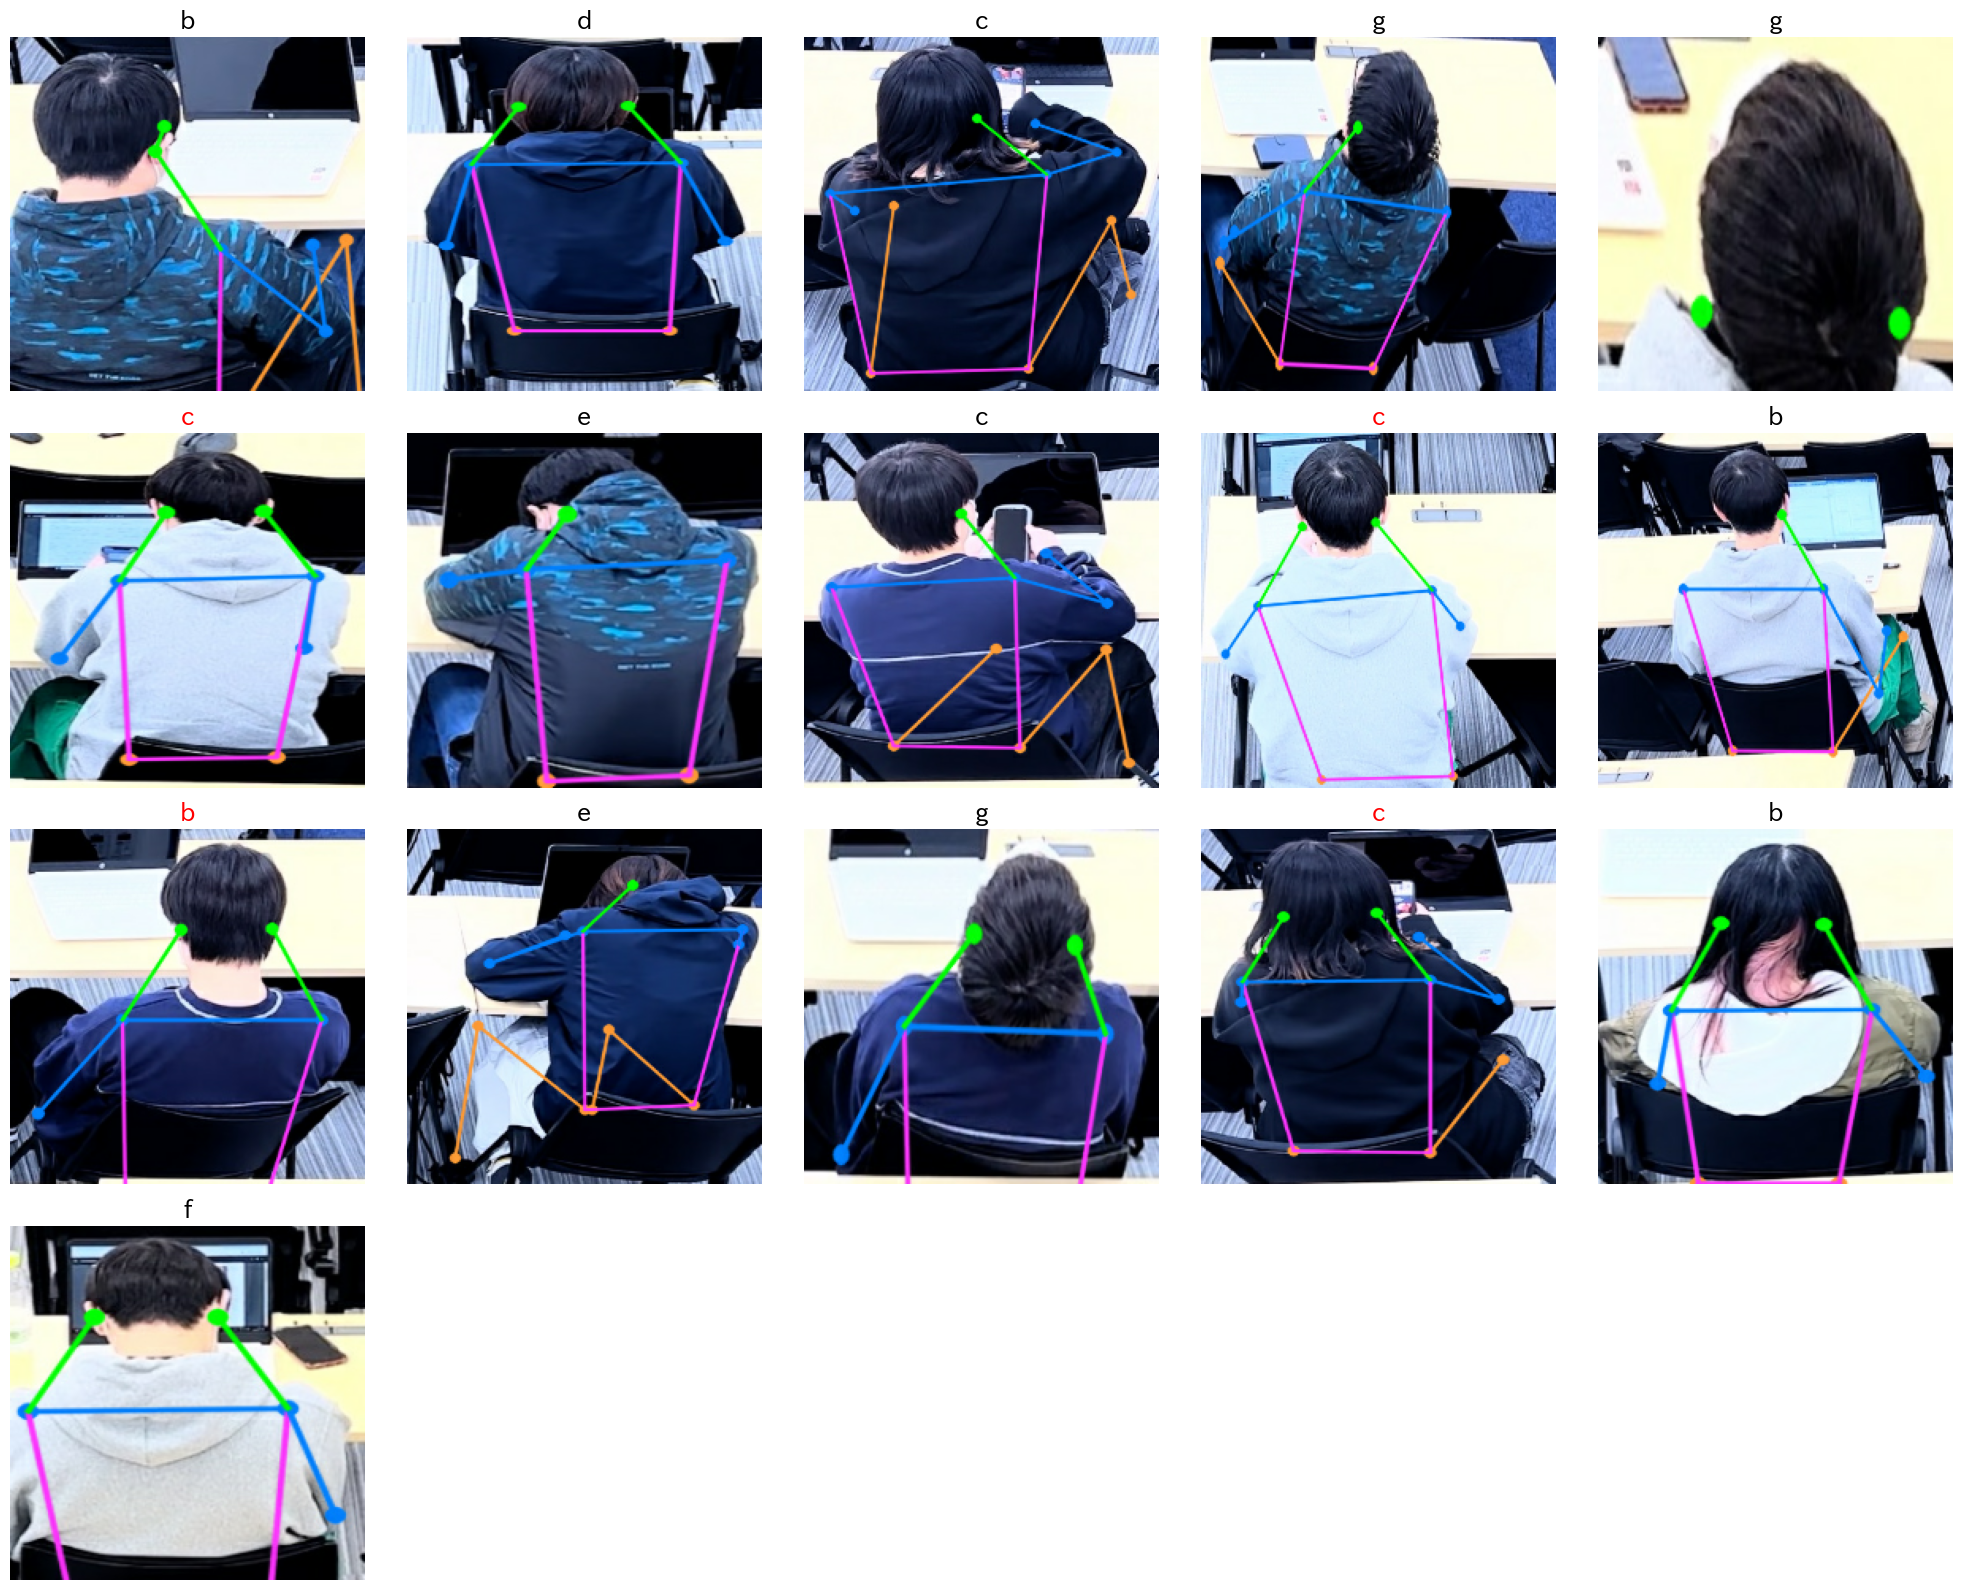

[1 3 2 6 6 3 4 2 0 1 5 4 6 3 1 5]


In [ ]:
test_dataset=image_dataset_from_directory(TOP_DIR + '/test',
                                          image_size=(224,224),
                                          batch_size=16, shuffle=True)
y_true=[]
# test_dataset.take(1): test_datasetから1バッチ分の画像とラベルを取得
for images, labels in test_dataset.take(1):
    print('画像枚数:', len(images))
    y_true.append(labels)
    y_pred=model.predict(images, verbose=0)
    print(y_pred)
    y_pred=np.argmax(y_pred, axis=1)
    show_prediction(images, labels, y_pred)

y_true=np.concatenate(y_true)
print(y_true)


<PIL.Image.Image image mode=RGB size=224x224 at 0x7E37A144ED90>
[[[253. 253. 251.]
  [254. 253. 251.]
  [254. 253. 251.]
  ...
  [233. 226. 220.]
  [233. 226. 220.]
  [235. 224. 220.]]

 [[255. 254. 252.]
  [254. 253. 251.]
  [255. 252. 251.]
  ...
  [241. 234. 228.]
  [240. 233. 227.]
  [242. 231. 227.]]

 [[254. 253. 249.]
  [255. 252. 251.]
  [255. 252. 251.]
  ...
  [241. 233. 230.]
  [239. 231. 228.]
  [239. 229. 227.]]

 ...

 [[215. 219. 230.]
  [215. 219. 230.]
  [217. 221. 232.]
  ...
  [213. 217. 228.]
  [215. 219. 230.]
  [218. 222. 233.]]

 [[214. 221. 231.]
  [212. 219. 227.]
  [214. 221. 229.]
  ...
  [213. 220. 230.]
  [211. 218. 228.]
  [210. 217. 227.]]

 [[212. 222. 232.]
  [210. 220. 229.]
  [211. 221. 230.]
  ...
  [215. 225. 235.]
  [210. 220. 230.]
  [212. 222. 232.]]]
[[[[253. 253. 251.]
   [254. 253. 251.]
   [254. 253. 251.]
   ...
   [233. 226. 220.]
   [233. 226. 220.]
   [235. 224. 220.]]

  [[255. 254. 252.]
   [254. 253. 251.]
   [255. 252. 251.]
   ...
  

Model: "functional_226"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_102 (InputLayer)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_100 (Flatten)                │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_200 (Dropout)                │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,139,271 (80.64 MB)

 Trainable params: 13,504,007 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

tf.Tensor(
[[5.2941822e-02 8.5100561e-02 1.5090813e-03 4.8517417e-03 4.3292347e-04
  2.5012508e-01 6.0503882e-01]], shape=(1, 7), dtype=float32)
tf.Tensor([0.6050388], shape=(1,), dtype=float32)
tf.Tensor(
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ..

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_2802']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


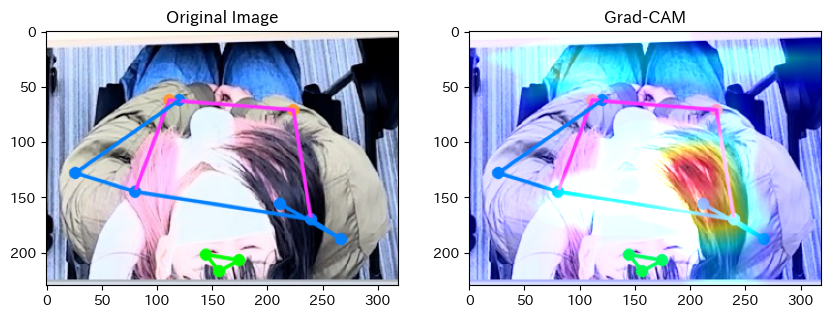

In [ ]:
#import os

#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# ★：新設
def build_model(num_classes):
    # 検証データ用にVGG16モデルを作り直す
    # 検証データに対して使用するのでデータ拡張をスキップ
    # RGB変換や正規化はprepro_image関数で行うので
    # data_augmentation, Lambda(rgb2bgr)), Rescaling(1/255.0))は不要
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers[1:15]: # 特徴抽出部分の各レイヤーについて
        layer.trainable = False # VGG-16特徴抽出部分の層は学習不可能にする。

    for layer in base_model.layers[15:]:
        layer.trainable = True


    # 分類器は学習時と同じ構造にする
    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)
    return model

def prepro_image(img_path):
    img =  keras.utils.load_img(img_path, target_size=(224, 224))
    print(img)
    array =  keras.utils.img_to_array(img)
    print(array)
    array = np.expand_dims(array, axis=0)
    print(array)
    array = keras.applications.vgg16.preprocess_input(array) # RGB to BGR. each color channel is zero-centered
    print(array)
    return array/255.0

img_path = 'Untitled Folder/test/g/a6-6-8.jpg'

preprocessed_img = prepro_image(img_path)

# 追加 ##############################
num_classes = 7  # クラス数
model = build_model(num_classes)
model.load_weights('modelw.weights.h5')  # 学習時に保存したモデルパラメータをロード
# 追加：ここまで ####################

pred = model.predict(preprocessed_img)

def get_gradcam_heatmap(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output] # ★修正
    )
    print(img_array)
    print(type(img_array))
    grad_model.summary()
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)

        loss = predictions[:, tf.argmax(predictions[0])]
    print(predictions)
    print(loss)
    print(conv_outputs)
    grads = tape.gradient(loss, conv_outputs) # 勾配を取得
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)) # チャンネルごとの平均勾配を算出。バッチ、縦、横方向に平均する

    conv_outputs = conv_outputs[0] # layer_nameの出力する特徴量マップ
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis] # 特徴量マップにチャネルごとの平均勾配をかける(勾配の大きなチャネルがより重視される)
    heatmap = tf.squeeze(heatmap) # 不要な次元の削除。ex. (height, width, 1) -> (height, width)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ヒートマップを画像に重ねる
def superimpose_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img # alphaを大きくするとheatmapの画像が強調される
    return superimposed_img

heatmap = get_gradcam_heatmap(model, preprocessed_img, 'block5_conv3')
superimposed_img = superimpose_heatmap(img_path, heatmap, alpha=0.6)
superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

# 結果の表示
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image.load_img(img_path))

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.show()

